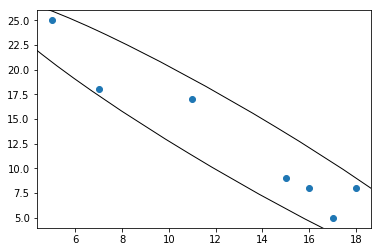

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse

def eigsorted(cov):
    vals, vecs = np.linalg.eigh(cov)
    order = vals.argsort()[::-1]
    return vals[order], vecs[:,order]

x = [5,7,11,15,16,17,18]
y = [25, 18, 17, 9, 8, 5, 8]


nstd = 2
ax = plt.subplot(111)

cov = np.cov(x, y)
vals, vecs = eigsorted(cov)
theta = np.degrees(np.arctan2(*vecs[:,0][::-1]))
w, h = 2 * nstd * np.sqrt(vals)
ell = Ellipse(xy=(np.mean(x), np.mean(y)),
              width=w, height=h,
              angle=theta, color='black')
ell.set_facecolor('none')
ax.add_artist(ell)
plt.scatter(x, y)
plt.show()

In [23]:
def mutation_draw(mutator, title):
    mutations = mutator(N)
    domain_X = np.arange(-5, 5, 0.25)
    domain_Y = np.arange(-5, 5, 0.25)
    X, Y = np.meshgrid(domain_X, domain_Y)
    Z = - objective_function(np.vstack([X.ravel(), Y.ravel()]).T).reshape(X.shape[0], X.shape[1])
    
    
    fig = plt.figure(figsize=(9, 9))
    ax = fig.add_subplot(111, aspect='equal')
    plt.contour(X, Y, Z, 50)
    plt.plot(mutations[:, 0], mutations[:, 1], 'ro')
    plt.plot(original_individual[0, 0], original_individual[0, 1], 'k*', markersize=24)
    plt.title(title)
    
    cov = np.array([[0.25, 0.], [0., 0.5]])
    vals, vecs = eigsorted(cov)
    theta = np.degrees(np.arctan2(*vecs[:,0][::-1]))
    w, h = 2 * nstd * np.sqrt(vals)
    print w, h
    ell = Ellipse(xy=(1, 1),
              width=w, height=h,
              angle=theta, color='black')
    ell.set_facecolor('none')
    ax.add_artist(ell)    
    plt.show()
    
def mutator1(N):
    return original_individual + sigma * np.random.randn(N, 2)

def mutator2(N):
    return original_individual + np.dot(np.random.randn(N, 2), np.linalg.cholesky(S).T)


# Sphere function - modified
def objective_function_F1a(X):
    return - (X[:, 0]**2 + 9*X[:, 1]**2)

2.82842712475 2.0


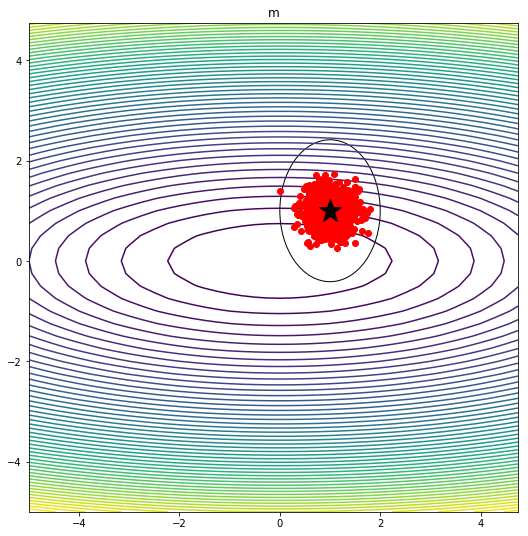

In [24]:
sigma = 0.25
N = 1000
d = 2

objective_function = objective_function_F1a

original_individual = np.array([[1, 1]])

mutation_draw(mutator1, "m")

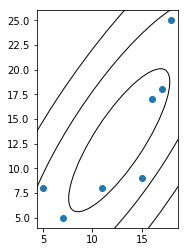

In [29]:
x = [5,7,11,15,16,17,18]
y = [8, 5, 8, 9, 17, 18, 25]
cov = np.cov(x, y)
lambda_, v = np.linalg.eig(cov)
lambda_ = np.sqrt(lambda_)
from matplotlib.patches import Ellipse
import matplotlib.pyplot as plt
ax = plt.subplot(111, aspect='equal')
for j in xrange(1, 4):
    ell = Ellipse(xy=(np.mean(x), np.mean(y)),
                  width=lambda_[0]*j*2, height=lambda_[1]*j*2,
                  angle=np.rad2deg(np.arccos(v[0, 0])), color = "black")
    ell.set_facecolor('none')
    ax.add_artist(ell)
plt.scatter(x, y)
plt.show()

In [31]:
# Author: Jake VanderPlas
# License: BSD
#   The figure produced by this code is published in the textbook
#   "Statistics, Data Mining, and Machine Learning in Astronomy" (2013)
#   For more information, see http://astroML.github.com
#   To report a bug or issue, use the following forum:
#    https://groups.google.com/forum/#!forum/astroml-general
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.patches import Ellipse
from astroML.stats.random import bivariate_normal

#----------------------------------------------------------------------
# This function adjusts matplotlib settings for a uniform feel in the textbook.
# Note that with usetex=True, fonts are rendered with LaTeX.  This may
# result in an error if LaTeX is not installed on your system.  In that case,
# you can set usetex to False.
from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=8, usetex=True)

#------------------------------------------------------------
# Define the mean, principal axes, and rotation of the ellipse
mean = np.array([0, 0])
sigma_1 = 2
sigma_2 = 1
alpha = np.pi / 4

#------------------------------------------------------------
# Draw 10^5 points from a multivariate normal distribution
#
#   we use the bivariate_normal function from astroML.  A more
#   general function for this is numpy.random.multivariate_normal(),
#   which requires the user to specify the full covariance matrix.
#   bivariate_normal() generates this covariance matrix for the
#   given inputs.
np.random.seed(0)
x, cov = bivariate_normal(mean, sigma_1, sigma_2, alpha, size=100000,
                          return_cov=True)

sigma_x = np.sqrt(cov[0, 0])
sigma_y = np.sqrt(cov[1, 1])
sigma_xy = cov[0, 1]

#------------------------------------------------------------
# Plot the results
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111)

# plot a 2D histogram/hess diagram of the points
H, bins = np.histogramdd(x, bins=2 * [np.linspace(-4.5, 4.5, 51)])
ax.imshow(H, origin='lower', cmap=plt.cm.binary, interpolation='nearest',
          extent=[bins[0][0], bins[0][-1], bins[1][0], bins[1][-1]])

# draw 1, 2, 3-sigma ellipses over the distribution
for N in (1, 2, 3):
    ax.add_patch(Ellipse(mean, N * sigma_1, N * sigma_2,
                         angle=alpha * 180. / np.pi, lw=1,
                         ec='k', fc='none'))

kwargs = dict(ha='left', va='top', transform=ax.transAxes)

ax.text(0.02, 0.98, r"$\sigma_1 = %i$" % sigma_1, **kwargs)
ax.text(0.02, 0.93, r"$\sigma_2 = %i$" % sigma_2, **kwargs)
ax.text(0.02, 0.88, r"$\alpha = \pi / %i$" % (np.pi / alpha), **kwargs)

ax.text(0.15, 0.98, r"$\sigma_x = %.2f$" % sigma_x, **kwargs)
ax.text(0.15, 0.93, r"$\sigma_y = %.2f$" % sigma_y, **kwargs)
ax.text(0.15, 0.88, r"$\sigma_{xy} = %.2f$" % sigma_xy, **kwargs)

ax.set_xlabel('$x$')
ax.set_ylabel('$y$')

plt.show()

ImportError: No module named astroML.stats.random